In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "/kaggle/input/decision/cleaned_diabetes_dataset.csv"
df = pd.read_csv(file_path)

In [3]:
df = df.drop(columns=["ID", "No_Pation"])

In [4]:
label_encoders = {}
for col in ["Gender", "CLASS"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [5]:
X = df.drop(columns=["CLASS"])
y = df["CLASS"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
y_pred = clf.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", report)

Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.89      1.00      0.94         8
           2       0.99      0.98      0.99       170

    accuracy                           0.97       200
   macro avg       0.93      0.96      0.95       200
weighted avg       0.98      0.97      0.98       200



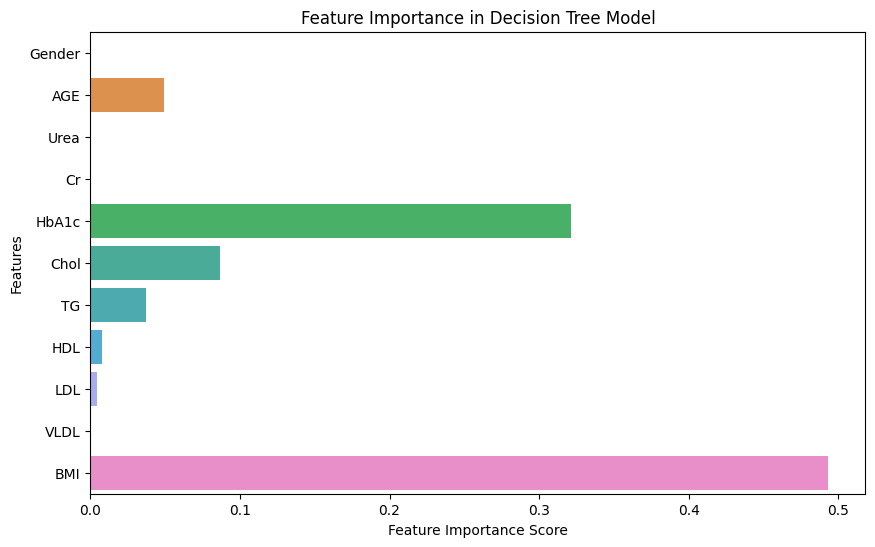

In [10]:
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree Model")
plt.show()
